In [1]:
# imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [31]:
en = 3
ch = 3
P = np.array([.2,.4,.4])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
# E = np.array([[.6,.9,.3],[.3,.5,.1],[.4,.1,.05]])
R = np.array([8.,6.,4.])
# P = row_normalize([np.random.rand(ch)/2])[0]
# E = np.random.rand(en,ch)/2
# R = np.array([np.random.randint(1,10) for i in range(en)])
tol = .3
print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.2 0.4 0.4]
[8. 6. 4.]
0.2


In [10]:
# example 2
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.15  0.05  0.075 0.175 0.1   0.05  0.125 0.1   0.05  0.125]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.2   0.15 ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2   0.2   0.125]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.175 0.275]
 [0.225 0.25  0.2   0.275 0.35  0.225 0.275 0.175 0.175 0.275]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.05  0.15 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.125 0.2  ]
 [0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.05  0.15 ]
 [0.275 0.225 0.225 0.15  0.15  0.175 0.125 0.2   0.2   0.05 ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.1   0.2  ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.2   0.175 0.2   0.3  ]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.2   0.125]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.15  0.2  ]]
[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [ ]:
# random example generator
en = 15
ch = 20
P = normalize(rd.rand(ch))
E = rd.rand(en,ch)/2
R = np.array(rd.randint(low=1,high=2*en,size=en),float)
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

In [3]:
# example 2
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.15 0.05 0.1  0.2  0.15 0.05 0.15 0.15]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]
0.13


In [39]:
en = 5
ch = 4
P = np.array([.3,.1,.2,.4])
E = np.array([[.4,.6,.4,.3],[.3,.4,.4,.3],[.3,.2,.1,.4],[.1,.35,.3,.4],[.2,.4,.1,.3]])
R = np.array([7.,5.5,4.,6.,5.])
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub)) # .35

[0.3 0.1 0.2 0.4]
[[0.4  0.6  0.4  0.3 ]
 [0.3  0.4  0.4  0.3 ]
 [0.3  0.2  0.1  0.4 ]
 [0.1  0.35 0.3  0.4 ]
 [0.2  0.4  0.1  0.3 ]]
[7.  5.5 4.  6.  5. ]
0.24


In [4]:
tol = .2
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(tol)
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.2
6.518518518518519 1.0 [0.] True 0.2
[0.         0.         0.37037037 0.62962963 0.         0.        ]


In [5]:
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
for i in range(500):
    c_arr.append(1.0-bernoulli(E[sample(x0)][sample(P)]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

True
1.0
[0.5 0.  0.5 0.  0.  0. ]
0.162 4.0


In [6]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.1 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)*R_sum];c = [c0]
b = []; enc = [];chnl = []
avg_rate = [dot(x[0],Rn)*R_sum]

In [7]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama = 1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),ltemp.success,end='\n')
    # print(np.mean(ub),alfa_c*betat*np.mean(val))
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)

1 8.0 0.0 True
2 8.0 0.0 True
3 8.0 0.0 True
4 8.0 0.0 True
5 8.0 0.0 True
6 8.0 0.0 True
7 8.0 0.0 True
8 8.0 0.0 True
9 8.0 0.0 True
10 5.60853 0.1 True
11 6.88899 0.0909 True
12 7.03667 0.0833 True
13 7.12901 0.0769 True
14 5.43912 0.1429 True
15 6.30362 0.1333 True
16 6.54631 0.125 True
17 6.69043 0.1176 True
18 6.7916 0.1111 True
19 6.86884 0.1053 True
20 6.93092 0.1 True
21 6.01425 0.1429 True
22 6.11027 0.1818 True
23 6.27718 0.1739 True
24 6.39503 0.1667 True
25 6.48522 0.16 True
26 6.55777 0.1538 True
27 5.75085 0.1852 True
28 5.91616 0.1786 True
29 6.03587 0.1724 True
30 5.01389 0.2 True
31 5.31717 0.1935 True
32 5.50651 0.1875 True
33 5.64277 0.1818 True
34 5.74848 0.1765 True
35 5.83447 0.1714 True
36 5.90674 0.1667 True
37 5.96895 0.1622 True
38 6.02349 0.1579 True
39 6.07199 0.1538 True
40 5.66858 0.175 True
41 5.73973 0.1707 True
42 5.80114 0.1667 True
43 5.8551 0.1628 True
44 5.9032 0.1591 True
45 5.94655 0.1556 True
46 5.98601 0.1522 True
47 6.02222 0.1489 True
48 6.05

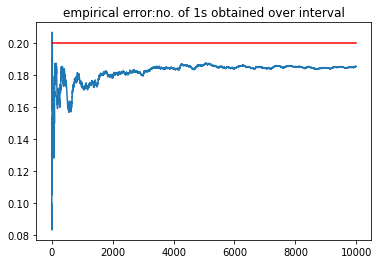

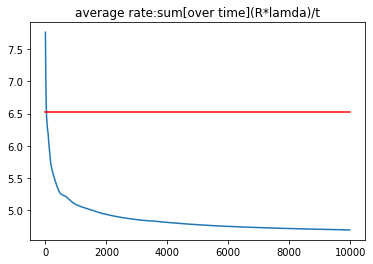

In [11]:
stat = 10
end = 10000
org_rate = dot(org_x,R)
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[tol,tol],'r')
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [45]:
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(rate_plot[end-2],avg_rate[end-2],dot(org_x,R))

[0.25 0.25 0.5  0.   0.  ]
--------------------------------------------------------------------------
[0.78696189 0.         0.21303811 0.         0.        ]
[0.68421053 0.         0.         0.31578947 0.        ]
0.3593718743748742 0.35
6.421148366687209 6.3608856717926985 6.684210526315789


0.49851633860619476


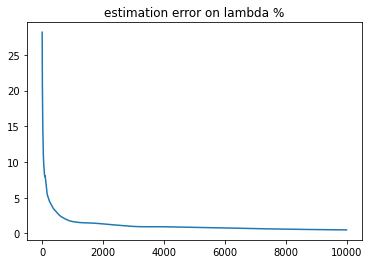

In [38]:
err = []
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/en)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on lambda %')
plt.show()

In [ ]:
err = (float(en)-1.0)/(2.0*float(en)+1.0)
alfa_c = 1.0
regret = [0.0]
for t in range(1,10000):
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa
    y = (tol-c0+(alfa_c*betat*err))/(tol+(betat*(1.0+alfa_c*math.sqrt(float(en))*np.linalg.norm(x0-(dot(x0,e0)*e0))-c0)))
    regret.append(((dot(org_x,R)-dot(x0.flatten(),R))*(1.0-y))+ regret[-1])
    # print(t,1-y,(dot(org_x,R)-dot(x0.flatten(),R))*(1.0-y))

In [ ]:
plt.plot(regret)
plt.show()

In [ ]:
# Rough
t = 100
betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa
err = (float(en)-1.0)/(2.0*float(en)+1.0)
y = (tol-c0+(alfa_c*betat*err))/(tol+(betat*(1.0+alfa_c*math.sqrt(float(en))*np.linalg.norm(x0-(dot(x0,e0)*e0))-c0)))
print(1.0-y, y)
print((dot(org_x,R)-dot(x0.flatten(),R))*(1.0-y)*t)
print(R)

In [ ]:
# Rough
t = 100
betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa
err = (float(en)-1.0)/(1.5*float(en)+1.0)
y = (tol-c0+(alfa_c*betat*err))/(tol+(betat*(1.0+alfa_c*math.sqrt(float(en))*np.linalg.norm(x0-(dot(x0,e0)*e0))-c0)))
print(1.0-y, y)
print((dot(org_x,R)-dot(x0.flatten(),R))*(1.0-y)*t)
print(R)